<a href="https://www.kaggle.com/code/ahmadibraheeem/titanic-predictive-model?scriptVersionId=117142679" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading Train Data

In [2]:
titanic_data = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
titanic_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

## Feature Corrolation Heatmap

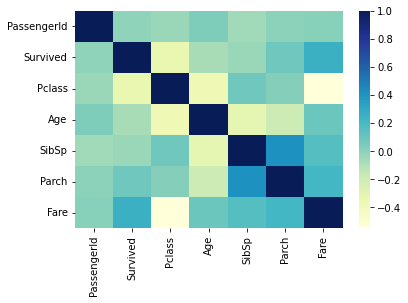

In [5]:
import seaborn as sns
sns.heatmap(titanic_data.corr(),cmap="YlGnBu")
plt.show()

## Creating Stratified Dataset

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
split_data = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in split_data.split(titanic_data,titanic_data[["Survived","Pclass","Sex"]]):
    strat_train_set = titanic_data.loc[train_index]
    strat_test_set = titanic_data.loc[test_index]

In [7]:
strat_test_set

PassengerId  Survived  Pclass  \
430          431         1       1   
297          298         0       1   
328          329         1       3   
655          656         0       2   
620          621         0       3   
..           ...       ...     ...   
109          110         1       3   
665          666         0       2   
52            53         1       1   
183          184         1       2   
90            91         0       3   

                                               Name     Sex   Age  SibSp  \
430       Bjornstrom-Steffansson, Mr. Mauritz Hakan    male  28.0      0   
297                    Allison, Miss. Helen Loraine  female   2.0      1   
328  Goldsmith, Mrs. Frank John (Emily Alice Brown)  female  31.0      1   
655                       Hickman, Mr. Leonard Mark    male  24.0      2   
620                             Yasbeck, Mr. Antoni    male  27.0      1   
..                                              ...     ...   ...    ...   
109                             Moran, Miss. Bertha  female   NaN      1   
665                              Hickman, Mr. Lewis    male  32.0      2   
52         Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
183                       Becker, Master. Richard F    male   1.0      2   
90                             Christmann, Mr. Emil    male  29.0      0   

     Parch        Ticket      Fare    Cabin Embarked  
430      0        110564   26.5500      C52        S  
297      2        113781  151.5500  C22 C26        S  
328      1        363291   20.5250      NaN        S  
655      0  S.O.C. 14879   73.5000      NaN        S  
620      0          2659   14.4542      NaN        C  
..     ...           ...       ...      ...      ...  
109      0        371110   24.1500      NaN        Q  
665      0  S.O.C. 14879   73.5000      NaN        S  
52       0      PC 17572   76.7292      D33        C  
183      1        230136   39.0000       F4        S  
90       0        343276    8.0500      NaN        S  

[179 rows x 12 columns]

### Comparing the destribution of "Survived","Pclass" in the Stratified 'train' and 'test' dataset

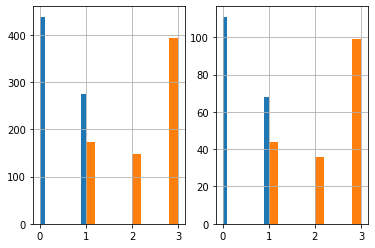

In [8]:
plt.subplot(1,2,1)
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()

plt.subplot(1,2,2)

strat_test_set["Survived"].hist()
strat_test_set["Pclass"].hist()

plt.show()

## Data Validation

In [9]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 464 to 344
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          563 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        162 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


## Imputing missing "Age" values

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer (BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform (self,X):
        imputer= SimpleImputer(strategy="mean")
        X['Age']= imputer.fit_transform(X[['Age']])
        return X

## Transforming "Embarked" and "Sex" Coulumns

In [11]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder (BaseEstimator, TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform (self,X):
        
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[["Embarked"]]).toarray()
        coulmn_names = ["C","S","Q","N"]
        
        for i in range(len(matrix.T)):
            X[coulmn_names[i]]= matrix.T[i]
            
        matrix = encoder.fit_transform(X[["Sex"]]).toarray()
        coulmn_names = ["Male","Female"]
        
        for i in range(len(matrix.T)):
            X[coulmn_names[i]]= matrix.T[i]
            
        return X

## Dropping irrelevant features

In [12]:
class FeatureDropper (BaseEstimator, TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform (self,X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"], axis=1, errors="ignore")

## Creating the pipeline

In [13]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer",AgeImputer()),
                     ("featureencoder", FeatureEncoder()),
                     ("featuredropper",FeatureDropper())])

## Transforming Stratified dataset

In [14]:
#strat_train_set
strat_train_set = pipeline.fit_transform(strat_train_set)
#help(pipeline.fit_transform([strat_train_set]))

## Scaling Strat dataset

In [15]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'],axis=1)
y = strat_train_set['Survived']
scaler = StandardScaler()
X_Data = scaler.fit_transform(X)
y_Data = y.to_numpy()

# Training strat Dataset

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [{"n_estimators":[100,300,500,700],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}]
grid_search = GridSearchCV(clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_Data,y_Data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [100, 300, 500, 700]}],
             return_train_score=True, scoring='accuracy')

## Identifying Best Estimator

In [17]:
final_clf = grid_search.best_estimator_
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=700)

## Accuracy Score

In [18]:
final_clf.score(X_Data,y_Data)

0.9508426966292135

# Working on the Full Dataset

## Scaling Full Dataset

In [19]:
#Scaling Production Data

from sklearn.preprocessing import StandardScaler

prod_clf = pipeline.fit_transform(titanic_data)

X = prod_clf.drop(['Survived'],axis=1)
y = prod_clf['Survived']
scaler = StandardScaler()
X_Prod_Data = scaler.fit_transform(X)
y_Prod_Data = y.to_numpy()

## The Production Classifier

In [20]:
#The Production Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

prod_clf = RandomForestClassifier()
param_grid = [{"n_estimators":[100,300,500,700],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}]
grid_search = GridSearchCV(prod_clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_Prod_Data,y_Prod_Data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [100, 300, 500, 700]}],
             return_train_score=True, scoring='accuracy')

## Identifying Best Estimator

In [21]:
prod_clf = grid_search.best_estimator_
prod_clf

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=500)

# Final Accuracy Score

In [22]:
prod_clf.score(X_Prod_Data,y_Prod_Data)

0.8529741863075196

# Reading and Scaling Test Data

In [23]:
titanic_test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
final_test_data = pipeline.fit_transform(titanic_test_data)
final_test_data = final_test_data.fillna(method="ffill")
scaler = StandardScaler()
Prod_test_data = scaler.fit_transform(final_test_data)

## Predicting Test Data

In [24]:
predictions= prod_clf.predict(Prod_test_data)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Outputting predictions file

In [25]:
#Creating Final DataFrame then exporting the output CSV file

final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv("predictions.csv", index=False)